# Lebesgue Constant

Copyright (C) 2024 Andreas Kloeckner

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [2]:
n = 10
nodes = np.linspace(-1, 1, n)

Create a Vandermonde matrix (as `vdm`) for monomial interpolation with `nodes`.

In [3]:
#clear
vdm = np.array([
    nodes**i for i in range(n)
]).T

Create a "fine" set of nodes (as `nodes_fine`) and a corresponding Vandermonde matrix with the monomials (as `vdm_fine`):

In [4]:
nodes_fine = np.linspace(-1, 1, 10_000)

vdm_fine = np.array([
    nodes_fine**i for i in range(n)
]).T

Generate 300 random functions with nodal data $\|\boldsymbol y\|_\infty \le 1$ and plot their interpolants on the fine grid:

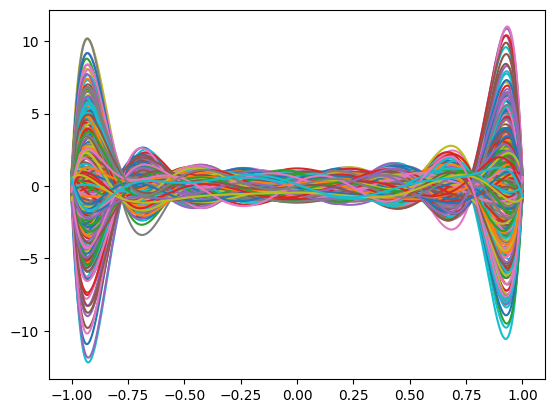

In [10]:
for _ in range(300):
    y = 2*np.random.rand(n) - 1
    coeffs = la.solve(vdm, y)
    yfine = vdm_fine @ coeffs
    plt.plot(nodes_fine, yfine)

Systematically estimate the Lebesgue constant:

In [11]:
#clear
la.norm(vdm_fine @ la.inv(vdm), np.inf)

np.float64(17.84860043752781)

Plug in all-ones data, disregarding signs:

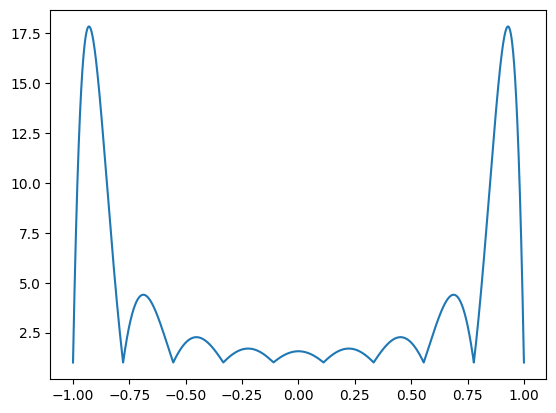

In [12]:
interp = vdm_fine @ la.inv(vdm)
worst = np.sum(np.abs(interp), axis=1)
plt.plot(nodes_fine, worst)

Now experiment:

- Increase `n`.
- Can you come up with better `nodes`?

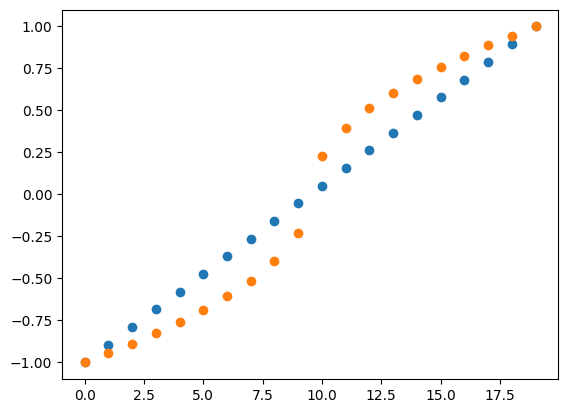

In [46]:
#clear
n = 20
nodes = np.linspace(-1, 1, n)
plt.plot(nodes, "o")
nodes = np.sign(nodes)*np.abs(nodes)**0.5
plt.plot(nodes, "o")

### Chebyshev nodes

Extremal/second kind:

In [7]:
k = n - 1
i = np.arange(0, k+1)

def f(x):
    return np.cos(k*np.arccos(x))

nodes = np.cos(i/k*np.pi)

Roots/first kind:

In [14]:
i = np.arange(1, n+1)
x = np.linspace(-1, 1, 3000)

def f(x):
    return np.cos(n*np.arccos(x))

nodes = np.cos((2*i-1)/(2*n)*np.pi)
